In [4]:
import matplotlib.pyplot as plt

def dig(df_l2, style, city_name, file_city_name, year_of_today):
    # 样式
    column = style["column"]       # 列名（指标）
    min_history_year = style["min_history_year"] # 显示最小的年份
    ylabel = style["ylabel"]       # y轴名称
    title = style["title"]         # 标题
    pathname = style["pathname"]   # 文件名


    # 历史数据-分析
    df_l2_history = df_l2[df_l2['year'] != year_of_today]
    ## 历史数据平均
    average_accumulated = df_l2_history.groupby('day_of_year')[column].mean().reset_index()
    ## 历史数据区间 5%-95%
    quantiles = df_l2_history.groupby('day_of_year')[column].quantile([0.05, 0.95]).unstack().reset_index()

    # 可视化
    fig = plt.figure(figsize=(10.5, 6))
    fig.text(0.5, 0.5, '© Xiamen Xiangyu', fontsize=30, color='gray',
             alpha=0.2, ha='center', va='center', rotation=30)
    ## (1)历史数据区间
    plt.fill_between(quantiles['day_of_year'],
                     quantiles[0.05],
                     quantiles[0.95],
                     color='skyblue',
                     alpha= 0.4,
                     label='5%-95%')
    ## (2)历史数据平均
    plt.plot(average_accumulated['day_of_year'],
             average_accumulated[column],
             "k--",
             linewidth=1.2,
             label='10yr_average')
    ## (3)历史历年数据
    years = df_l2['year'].unique()
    for year in years:
        if year != year_of_today and year >= min_history_year:
            year_data = df_l2[df_l2['year'] == year]
            plt.plot(year_data['day_of_year'],
                     year_data[column],
                     alpha=0.6,
                     linewidth=1.2,
                     label=year)
    ## (4)今年数据（过去）
    year_data = df_l2[(df_l2['year'] == year_of_today) & (df_l2['date'] <= '2025-07-01') ]
    plt.plot(year_data['day_of_year'],
             year_data[column],
             alpha=1.0,
             linewidth=1.5,
             color='red',
             label=year)
    ## (4)今年数据（预测）
    year_data = df_l2[(df_l2['year'] == year_of_today) & (df_l2['date'] > '2025-07-01')]
    plt.plot(year_data['day_of_year'],
             year_data[column],
             alpha=1.0,
             linewidth=1.5,
             linestyle = ':',
             color='red',
             # label='forecast'
             )
    ##
    month_ticks = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
    month_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    plt.xticks(month_ticks, month_labels)
    plt.xlabel('Months')
    plt.ylabel(ylabel)
    plt.title(f'{title}{city_name}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()
    # if pathname == "e_Degree_Day":
    #     plt.xlim(105, 260)
    # fig.savefig(f'./diagram/US/{file_city_name}_{pathname}.jpg', dpi=300)
    # plt.close(fig)

In [5]:
style = {   # 累计降水量
    "column": "cum_sum_precipitation_sum",
    "min_history_year": 2022,
    "ylabel": "Precipitation (mm)",
    "title": "Cumulative Annual Precipitation of ",
    "pathname": "a_Cumulative_Precip"
}

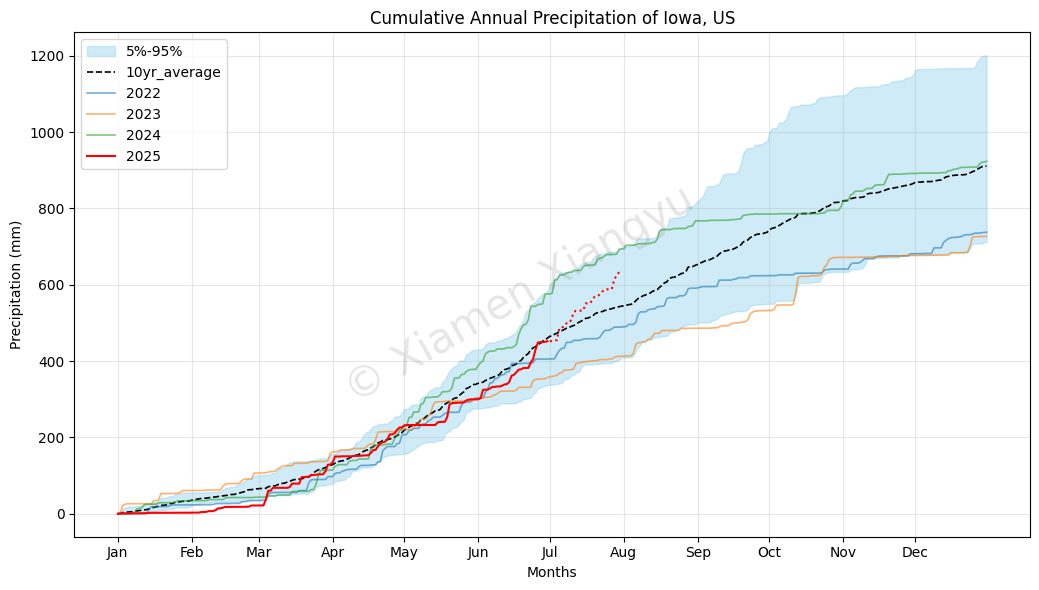

In [6]:
import pandas as pd

US = pd.read_csv('dataset/US.csv', sep = ',')
US = US[ (US['city'] == 'Iowa, US')]
US

dig(US, style, 'Iowa, US', 'Iowa, US', 2025)
